<a href="https://colab.research.google.com/github/aniketsharma00411/CMPUT655-Project/blob/main/rl_project_experiment_structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ray
from ray import tune
from ray.rllib.agents.ppo import PPOTrainer
from popgym.envs import labyrinth_escape, labyrinth_explore

import os

import matplotlib.pyplot as plt

# Configuration

In [ ]:
num_of_cycles = 2 #@param
total_timesteps_per_cycle = 5000 #@param
max_steps_per_episode = 5000 #@param

In [ ]:
ray.init()

2023-11-16 04:44:39,643	INFO worker.py:1553 -- Started a local Ray instance.


Python version:,3.9.18
Ray version:,2.3.0


# Defining Environments

In [ ]:
envs = ["LabyrinthEscapeEasy", "LabyrinthEscapeMedium", "LabyrinthEscapeHard", "LabyrinthExploreEasy", "LabyrinthExploreMedium", "LabyrinthExploreHard"]

ray.tune.registry.register_env("LabyrinthEscapeEasy", lambda env_config: labyrinth_escape.LabyrinthEscapeEasy())
ray.tune.registry.register_env("LabyrinthEscapeMedium", lambda env_config: labyrinth_escape.LabyrinthEscapeMedium())
ray.tune.registry.register_env("LabyrinthEscapeHard", lambda env_config: labyrinth_escape.LabyrinthEscapeHard())
ray.tune.registry.register_env("LabyrinthExploreEasy", lambda env_config: labyrinth_explore.LabyrinthExploreEasy())
ray.tune.registry.register_env("LabyrinthExploreMedium", lambda env_config: labyrinth_explore.LabyrinthExploreMedium())
ray.tune.registry.register_env("LabyrinthExploreHard", lambda env_config: labyrinth_explore.LabyrinthExploreHard())

# Defining Model

In [ ]:
model = {"use_attention": True}

# Running Experiments

In [ ]:
mean_reward_per_episode = {}
timesteps_done = {}
for env in envs:
    mean_reward_per_episode[env] = []
    timesteps_done[env] = []

previous_checkpoint_path = None

In [ ]:
for cycle_count in range(num_of_cycles):
    for env in envs:
        print(f'Starting Cycle {cycle_count} Environment {env}:')
        config = {
            "env": env,
            "num_gpus": 4,
            "model": model,
            "framework": "torch",
            "env_config": {
                "horizon": max_steps_per_episode
            }
        }

        trainer = PPOTrainer(env=env, config=config)
        if previous_checkpoint_path is not None:
            trainer.restore(previous_checkpoint_path+'/'+sorted(os.listdir(previous_checkpoint_path))[-1])

        previous_checkpoint_path = f"saved_checkpoints/agent_cycle_{cycle_count}_env_{env}"
        timesteps_total = 0
        while timesteps_total < total_timesteps_per_cycle:
            result = trainer.train()
            mean_reward_per_episode[env].append(result['episode_reward_mean'])
            print(timesteps_total)
            print(result['episode_reward_mean'])
            timesteps_done[env].append(result['timesteps_total'])
            timesteps_total = result['timesteps_total']
            trainer.save(previous_checkpoint_path)

2023-11-16 05:08:23,991	WARNING deprecation.py:50 -- DeprecationWarning: `algo = Algorithm(env='LabyrinthEscapeEasy', ...)` has been deprecated. Use `algo = AlgorithmConfig().environment('LabyrinthEscapeEasy').build()` instead. This will raise an error in the future!


Starting Cycle 0 Environment LabyrinthEscapeEasy:


(RolloutWorker pid=175889) 2023-11-16 05:08:27,783	WARNING env.py:156 -- Your env doesn't have a .spec.max_episode_steps attribute. Your horizon will default to infinity, and your environment will not be reset.
(RolloutWorker pid=175889) 2023-11-16 05:08:27,783	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
2023-11-16 05:08:28,238	WARNING util.py:67 -- Install gputil for GPU system monitoring.


0
-0.9990234375


2023-11-16 05:10:34,329	WARNING deprecation.py:50 -- DeprecationWarning: `algo = Algorithm(env='LabyrinthEscapeMedium', ...)` has been deprecated. Use `algo = AlgorithmConfig().environment('LabyrinthEscapeMedium').build()` instead. This will raise an error in the future!


4000
-0.7855747767857143
Starting Cycle 0 Environment LabyrinthEscapeMedium:


(RolloutWorker pid=183529) 2023-11-16 05:10:38,031	WARNING env.py:156 -- Your env doesn't have a .spec.max_episode_steps attribute. Your horizon will default to infinity, and your environment will not be reset.
(RolloutWorker pid=183529) 2023-11-16 05:10:38,031	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
2023-11-16 05:10:38,468	WARNING util.py:67 -- Install gputil for GPU system monitoring.
2023-11-16 05:10:38,500	INFO trainable.py:791 -- Restored on 129.128.243.187 from checkpoint: saved_checkpoints/agent_cycle_0_env_LabyrinthEscapeEasy/checkpoint_000002
2023-11-16 05:10:38,500	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 2, '_timesteps_total': None, '_time_total': 125.97753620147705, '_episodes_total': 7}
2023-11-16 05:11:46,464	WARNING deprecation.py:50 -- Deprecati

0
-0.9990234375
Starting Cycle 0 Environment LabyrinthEscapeHard:


(RolloutWorker pid=187529) 2023-11-16 05:11:50,187	WARNING env.py:156 -- Your env doesn't have a .spec.max_episode_steps attribute. Your horizon will default to infinity, and your environment will not be reset.
(RolloutWorker pid=187529) 2023-11-16 05:11:50,187	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
2023-11-16 05:11:50,633	WARNING util.py:67 -- Install gputil for GPU system monitoring.
2023-11-16 05:11:50,662	INFO trainable.py:791 -- Restored on 129.128.243.187 from checkpoint: saved_checkpoints/agent_cycle_0_env_LabyrinthEscapeMedium/checkpoint_000003
2023-11-16 05:11:50,662	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 3, '_timesteps_total': None, '_time_total': 193.9033546447754, '_episodes_total': 9}
2023-11-16 05:12:52,829	WARNING deprecation.py:50 -- Deprecat

0
-0.9990234375
Starting Cycle 0 Environment LabyrinthExploreEasy:


(RolloutWorker pid=191531) 2023-11-16 05:12:56,443	WARNING env.py:156 -- Your env doesn't have a .spec.max_episode_steps attribute. Your horizon will default to infinity, and your environment will not be reset.
(RolloutWorker pid=191531) 2023-11-16 05:12:56,443	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
2023-11-16 05:12:56,952	WARNING util.py:67 -- Install gputil for GPU system monitoring.
2023-11-16 05:12:56,985	INFO trainable.py:791 -- Restored on 129.128.243.187 from checkpoint: saved_checkpoints/agent_cycle_0_env_LabyrinthEscapeHard/checkpoint_000004
2023-11-16 05:12:56,985	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 4, '_timesteps_total': None, '_time_total': 256.05248951911926, '_episodes_total': 11}
2023-11-16 05:14:01,434	WARNING deprecation.py:50 -- Deprecat

0
-0.45371293048469363
Starting Cycle 0 Environment LabyrinthExploreMedium:


(RolloutWorker pid=195531) 2023-11-16 05:14:05,065	WARNING env.py:156 -- Your env doesn't have a .spec.max_episode_steps attribute. Your horizon will default to infinity, and your environment will not be reset.
(RolloutWorker pid=195531) 2023-11-16 05:14:05,066	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
2023-11-16 05:14:05,568	WARNING util.py:67 -- Install gputil for GPU system monitoring.
2023-11-16 05:14:05,596	INFO trainable.py:791 -- Restored on 129.128.243.187 from checkpoint: saved_checkpoints/agent_cycle_0_env_LabyrinthExploreEasy/checkpoint_000005
2023-11-16 05:14:05,596	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 5, '_timesteps_total': None, '_time_total': 320.46493911743164, '_episodes_total': 13}
2023-11-16 05:15:10,364	WARNING deprecation.py:50 -- Depreca

0
-0.7225203366623711
Starting Cycle 0 Environment LabyrinthExploreHard:


(RolloutWorker pid=199545) 2023-11-16 05:15:14,027	WARNING env.py:156 -- Your env doesn't have a .spec.max_episode_steps attribute. Your horizon will default to infinity, and your environment will not be reset.
(RolloutWorker pid=199545) 2023-11-16 05:15:14,027	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
2023-11-16 05:15:14,491	WARNING util.py:67 -- Install gputil for GPU system monitoring.
2023-11-16 05:15:14,519	INFO trainable.py:791 -- Restored on 129.128.243.187 from checkpoint: saved_checkpoints/agent_cycle_0_env_LabyrinthExploreMedium/checkpoint_000006
2023-11-16 05:15:14,520	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 6, '_timesteps_total': None, '_time_total': 385.19471073150635, '_episodes_total': 15}
2023-11-16 05:16:22,508	WARNING deprecation.py:50 -- Depre

0
-0.797766644021739
Starting Cycle 1 Environment LabyrinthEscapeEasy:


(RolloutWorker pid=203545) 2023-11-16 05:16:26,113	WARNING env.py:156 -- Your env doesn't have a .spec.max_episode_steps attribute. Your horizon will default to infinity, and your environment will not be reset.
(RolloutWorker pid=203545) 2023-11-16 05:16:26,113	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
2023-11-16 05:16:26,625	WARNING util.py:67 -- Install gputil for GPU system monitoring.
2023-11-16 05:16:26,657	INFO trainable.py:791 -- Restored on 129.128.243.187 from checkpoint: saved_checkpoints/agent_cycle_0_env_LabyrinthExploreHard/checkpoint_000007
2023-11-16 05:16:26,657	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 7, '_timesteps_total': None, '_time_total': 453.15755128860474, '_episodes_total': 17}
2023-11-16 05:17:34,080	WARNING deprecation.py:50 -- Depreca

0
-0.226806640625
Starting Cycle 1 Environment LabyrinthEscapeMedium:


(RolloutWorker pid=207552) 2023-11-16 05:17:37,686	WARNING env.py:156 -- Your env doesn't have a .spec.max_episode_steps attribute. Your horizon will default to infinity, and your environment will not be reset.
(RolloutWorker pid=207552) 2023-11-16 05:17:37,687	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
2023-11-16 05:17:38,264	WARNING util.py:67 -- Install gputil for GPU system monitoring.
2023-11-16 05:17:38,292	INFO trainable.py:791 -- Restored on 129.128.243.187 from checkpoint: saved_checkpoints/agent_cycle_1_env_LabyrinthEscapeEasy/checkpoint_000008
2023-11-16 05:17:38,293	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 8, '_timesteps_total': None, '_time_total': 520.5304045677185, '_episodes_total': 21}
2023-11-16 05:18:44,485	WARNING deprecation.py:50 -- Deprecati

0
-0.0638671875
Starting Cycle 1 Environment LabyrinthEscapeHard:


(RolloutWorker pid=211554) 2023-11-16 05:18:48,149	WARNING env.py:156 -- Your env doesn't have a .spec.max_episode_steps attribute. Your horizon will default to infinity, and your environment will not be reset.
(RolloutWorker pid=211554) 2023-11-16 05:18:48,149	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
2023-11-16 05:18:48,630	WARNING util.py:67 -- Install gputil for GPU system monitoring.
2023-11-16 05:18:48,659	INFO trainable.py:791 -- Restored on 129.128.243.187 from checkpoint: saved_checkpoints/agent_cycle_1_env_LabyrinthEscapeMedium/checkpoint_000009
2023-11-16 05:18:48,659	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 9, '_timesteps_total': None, '_time_total': 586.6865105628967, '_episodes_total': 26}
2023-11-16 05:19:53,763	WARNING deprecation.py:50 -- Depreca

0
-0.9990234375
Starting Cycle 1 Environment LabyrinthExploreEasy:


(RolloutWorker pid=215563) 2023-11-16 05:19:57,512	WARNING env.py:156 -- Your env doesn't have a .spec.max_episode_steps attribute. Your horizon will default to infinity, and your environment will not be reset.
(RolloutWorker pid=215563) 2023-11-16 05:19:57,512	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
2023-11-16 05:19:58,024	WARNING util.py:67 -- Install gputil for GPU system monitoring.
2023-11-16 05:19:58,051	INFO trainable.py:791 -- Restored on 129.128.243.187 from checkpoint: saved_checkpoints/agent_cycle_1_env_LabyrinthEscapeHard/checkpoint_000010
2023-11-16 05:19:58,052	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 651.7506182193756, '_episodes_total': 28}
2023-11-16 05:21:04,290	WARNING deprecation.py:50 -- Deprecat

0
-0.6034060108418366
Starting Cycle 1 Environment LabyrinthExploreMedium:


(RolloutWorker pid=219564) 2023-11-16 05:21:08,012	WARNING env.py:156 -- Your env doesn't have a .spec.max_episode_steps attribute. Your horizon will default to infinity, and your environment will not be reset.
(RolloutWorker pid=219564) 2023-11-16 05:21:08,012	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
2023-11-16 05:21:08,498	WARNING util.py:67 -- Install gputil for GPU system monitoring.
2023-11-16 05:21:08,536	INFO trainable.py:791 -- Restored on 129.128.243.187 from checkpoint: saved_checkpoints/agent_cycle_1_env_LabyrinthExploreEasy/checkpoint_000011
2023-11-16 05:21:08,537	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 11, '_timesteps_total': None, '_time_total': 717.9577903747559, '_episodes_total': 30}
2023-11-16 05:22:15,462	WARNING deprecation.py:50 -- Depreca

0
-0.7225203366623713
Starting Cycle 1 Environment LabyrinthExploreHard:


(RolloutWorker pid=223566) 2023-11-16 05:22:19,045	WARNING env.py:156 -- Your env doesn't have a .spec.max_episode_steps attribute. Your horizon will default to infinity, and your environment will not be reset.
(RolloutWorker pid=223566) 2023-11-16 05:22:19,045	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
2023-11-16 05:22:19,648	WARNING util.py:67 -- Install gputil for GPU system monitoring.
2023-11-16 05:22:19,674	INFO trainable.py:791 -- Restored on 129.128.243.187 from checkpoint: saved_checkpoints/agent_cycle_1_env_LabyrinthExploreMedium/checkpoint_000012
2023-11-16 05:22:19,675	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 12, '_timesteps_total': None, '_time_total': 784.853285074234, '_episodes_total': 32}


0
-0.7402647030279501


In [ ]:
ray.shutdown()

In [ ]:
mean_reward_per_episode

{'LabyrinthEscapeEasy': [-0.9990234375, -0.7855747767857143, -0.226806640625],
 'LabyrinthEscapeMedium': [-0.9990234375, -0.0638671875],
 'LabyrinthEscapeHard': [-0.9990234375, -0.9990234375],
 'LabyrinthExploreEasy': [-0.45371293048469363, -0.6034060108418366],
 'LabyrinthExploreMedium': [-0.7225203366623711, -0.7225203366623713],
 'LabyrinthExploreHard': [-0.797766644021739, -0.7402647030279501]}

In [ ]:
timesteps_done

{'LabyrinthEscapeEasy': [4000, 8000, 32000],
 'LabyrinthEscapeMedium': [12000, 36000],
 'LabyrinthEscapeHard': [16000, 40000],
 'LabyrinthExploreEasy': [20000, 44000],
 'LabyrinthExploreMedium': [24000, 48000],
 'LabyrinthExploreHard': [28000, 52000]}

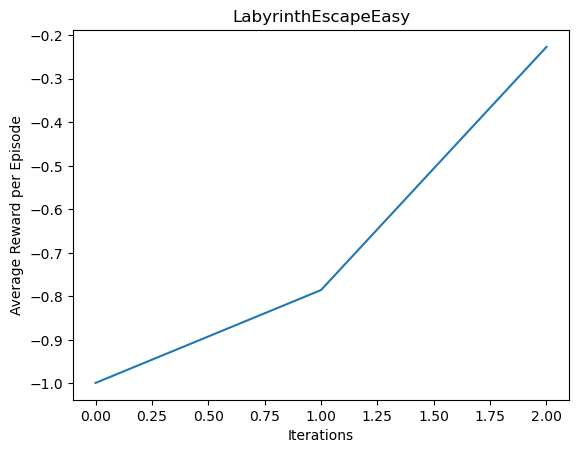

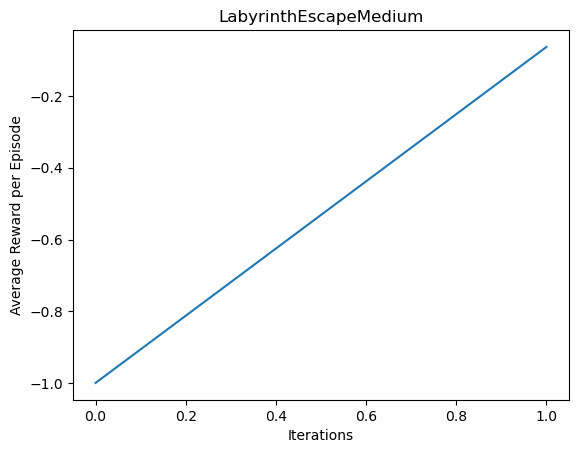

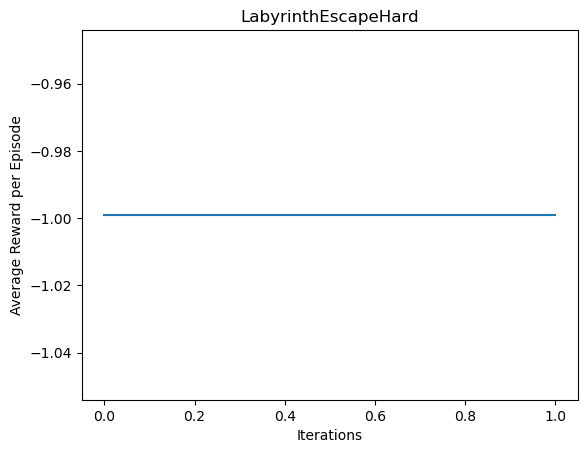

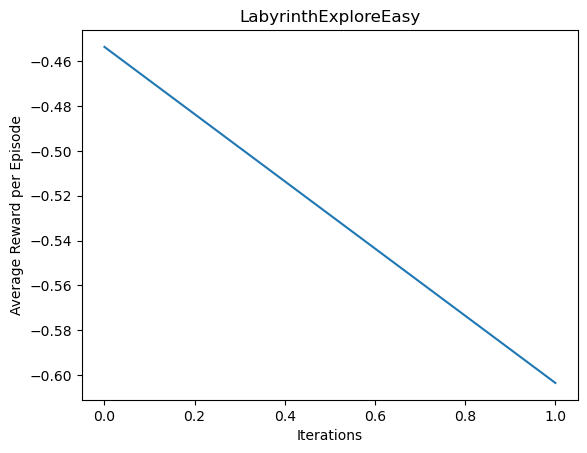

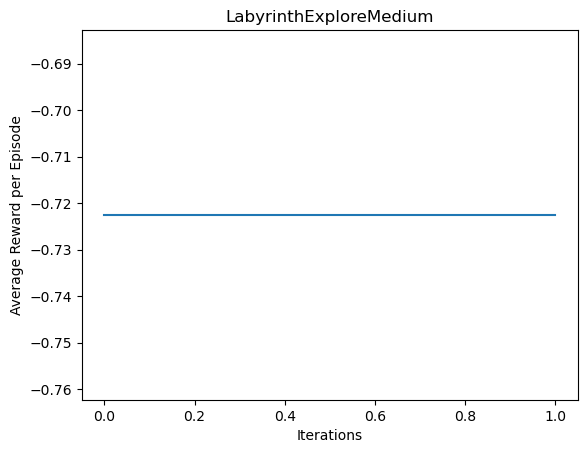

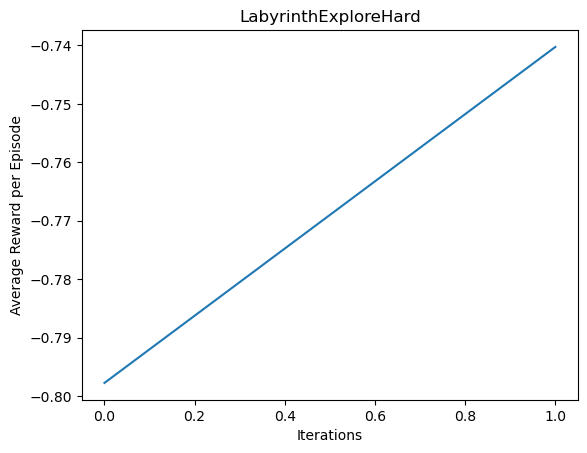

In [ ]:
for env in envs:
    plt.plot(mean_reward_per_episode[env])
    plt.title(env)
    plt.xlabel('Iterations')
    plt.ylabel('Average Reward per Episode')
    plt.show()